<a href="https://colab.research.google.com/github/Patelsandesh998/A-BASIC-TO-DO-WEBAPP/blob/main/Speech_Emotion_Recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Modules**

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

**Load the Dataset**

In [9]:
paths = []
labels = []
for dirname, _, filenames in os.walk('//content/drive/MyDrive/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))

        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
         break
print('Dataset is Loaded')

Dataset is Loaded


In [10]:
len(paths)

1827

In [11]:
paths[:5]

['//content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_fear/YAF_fail_fear.wav',
 '//content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_fear/YAF_merge_fear.wav',
 '//content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_fear/YAF_hall_fear.wav',
 '//content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_fear/YAF_dead_fear.wav',
 '//content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_fear/YAF_should_fear.wav']

In [12]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [13]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,//content/drive/MyDrive/TESS Toronto emotional...,fear
1,//content/drive/MyDrive/TESS Toronto emotional...,fear
2,//content/drive/MyDrive/TESS Toronto emotional...,fear
3,//content/drive/MyDrive/TESS Toronto emotional...,fear
4,//content/drive/MyDrive/TESS Toronto emotional...,fear


In [14]:
df['label'].value_counts()

,count
label,
fear,400
angry,400
neutral,227
ps,200
happy,200
disgust,200
sad,200


**Exploratory Data Analysis**

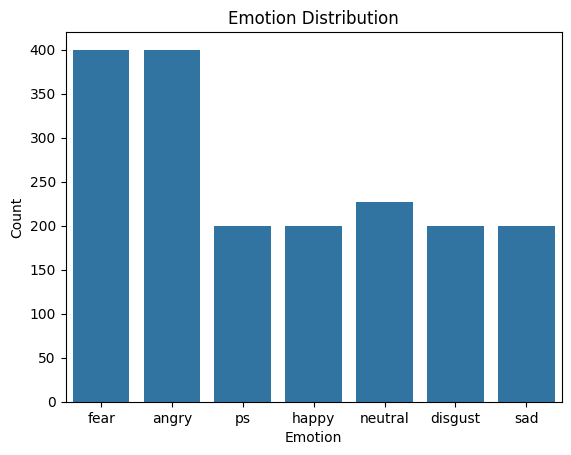

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correct way
sns.countplot(x='label', data=df)

plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

In [22]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)

    plt.show()

def spectogram(data, sr, emotion):
     x = librosa.stft(data)
     xdb = librosa.amplitude_to_db(abs(x))
     plt.figure(figsize=(11,4))
     plt.title(emotion, size=20)
     librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
     plt.colorbar()

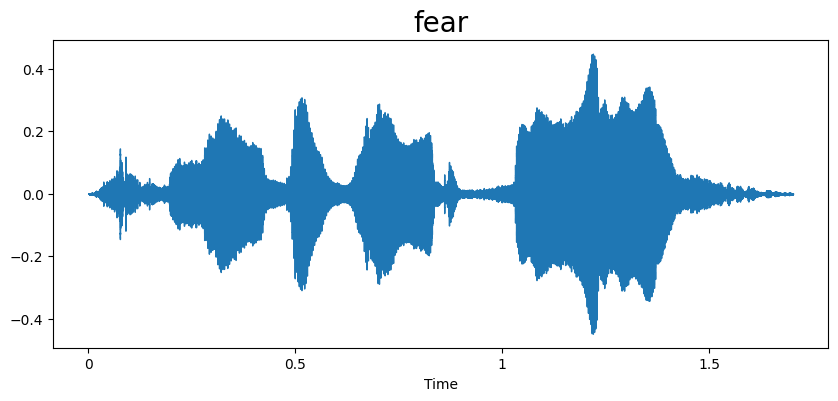

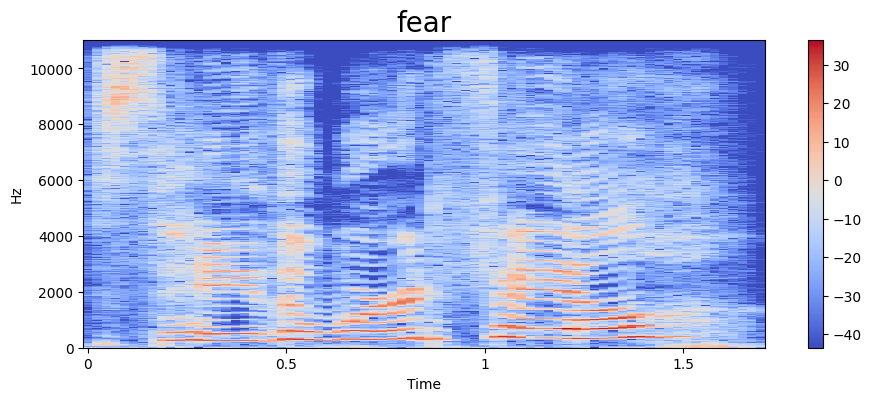

In [23]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

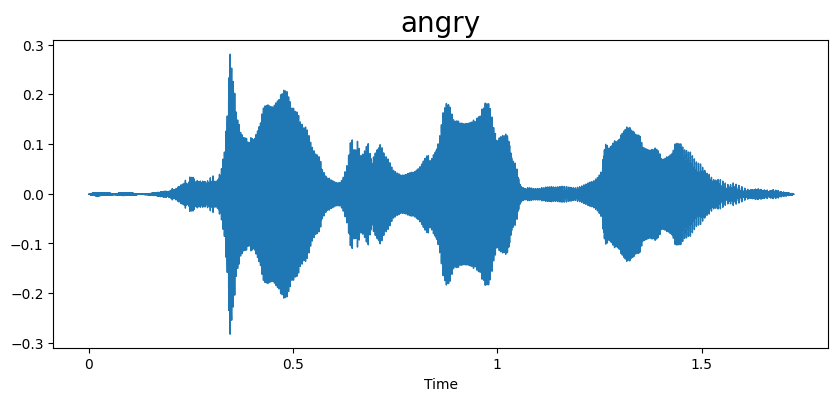

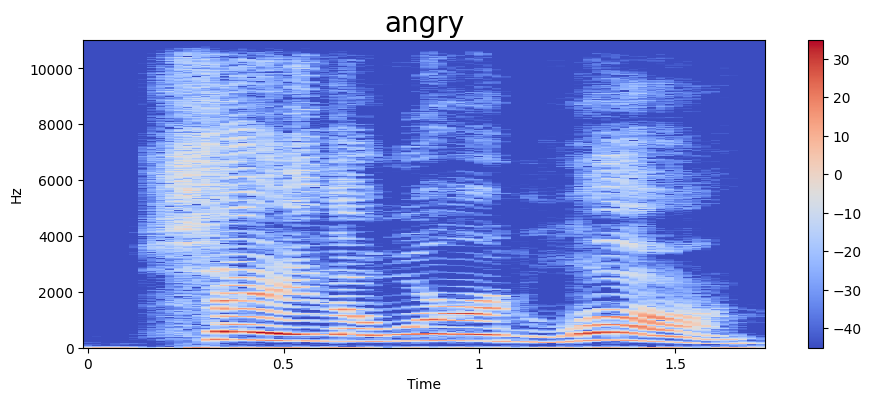

In [24]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

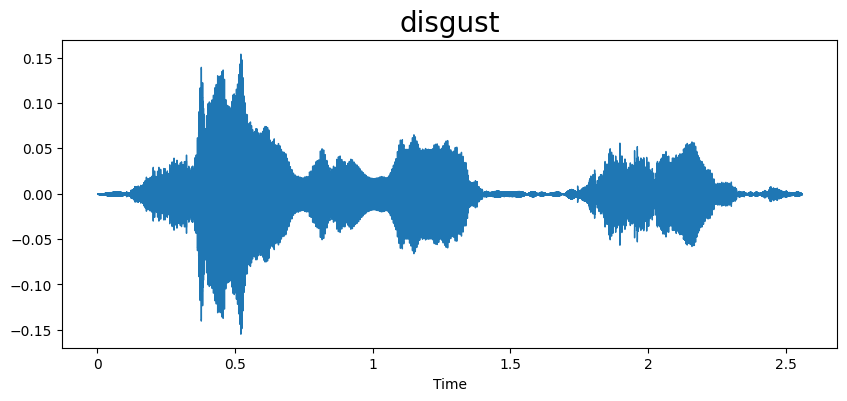

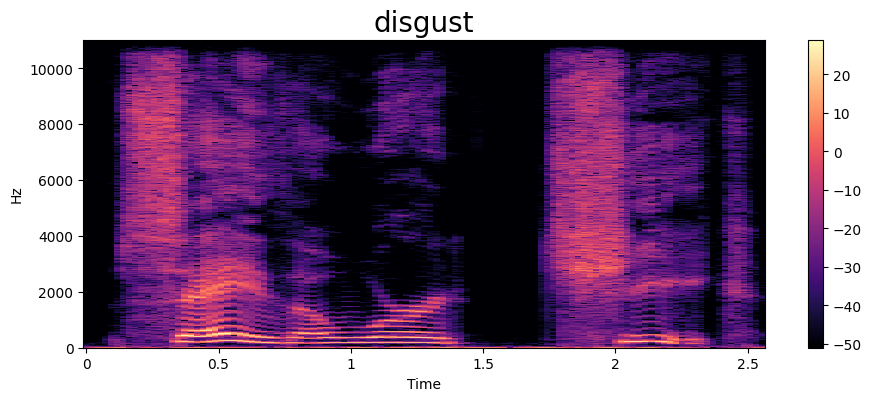

In [25]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

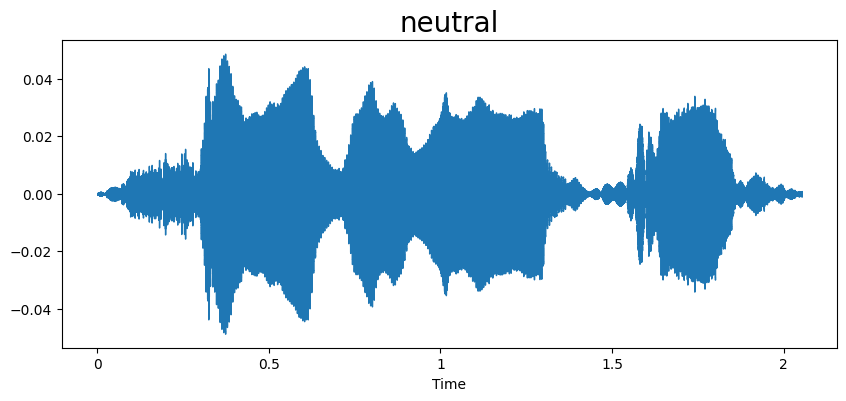

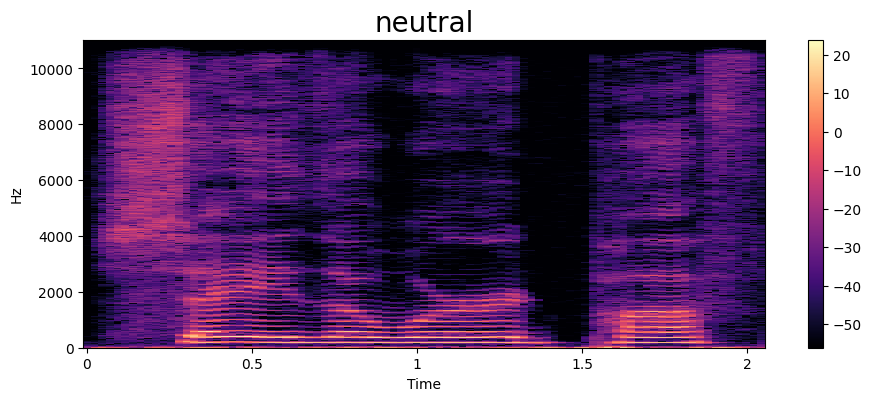

In [26]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

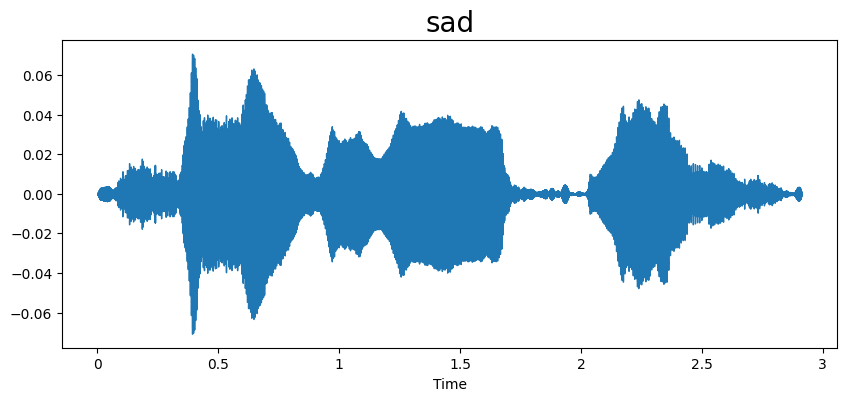

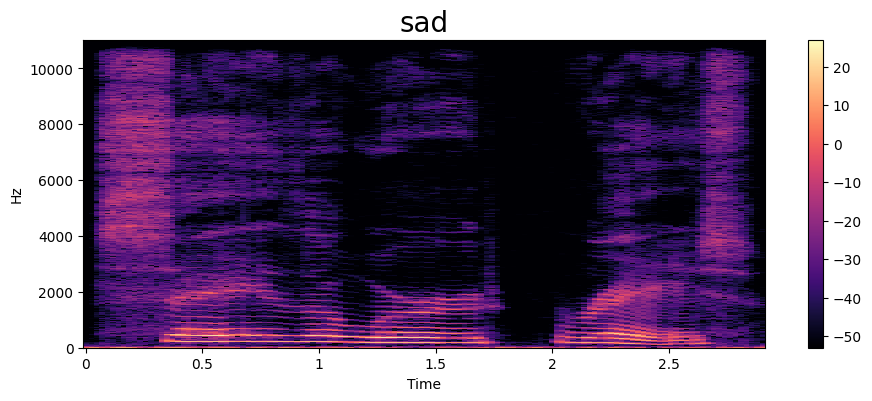

In [27]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

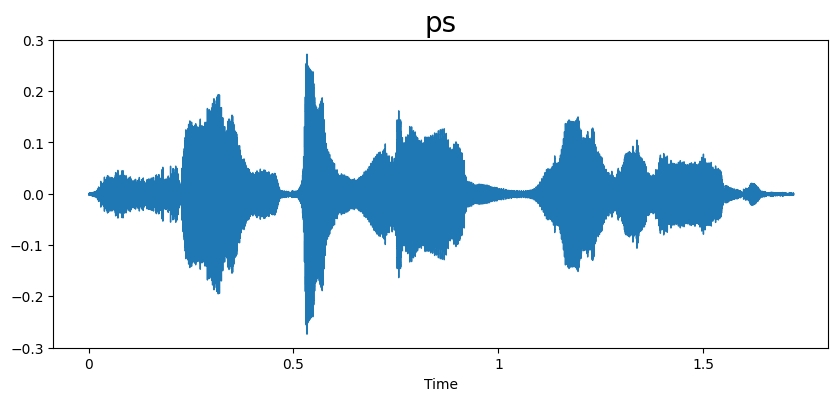

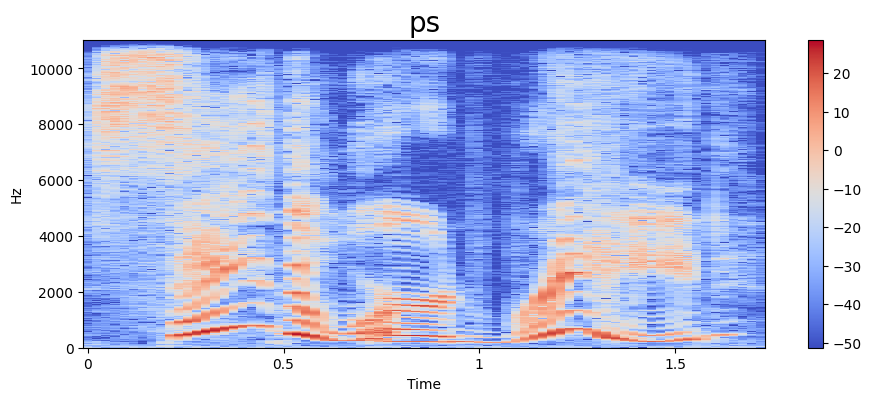

In [28]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

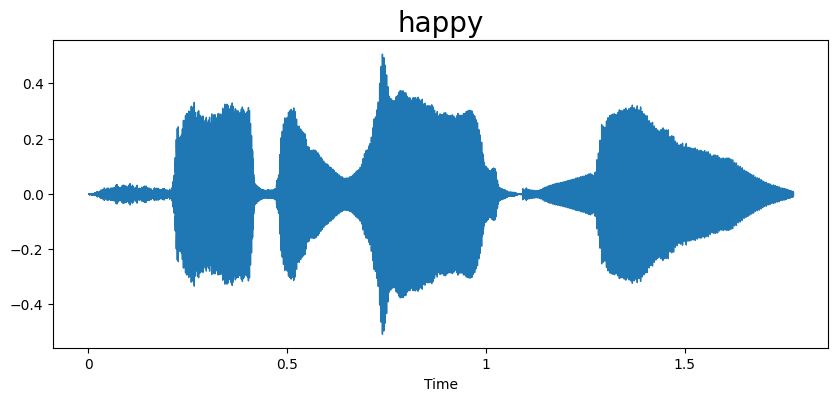

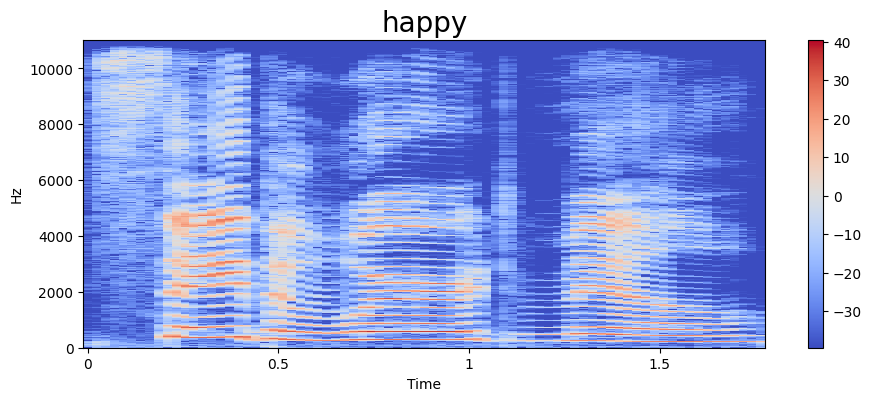

In [29]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Feature Extraction**

In [30]:
def extract_mfcc(filename):
     y, sr = librosa.load(filename, duration=3, offset=0.5)
     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
     return mfcc

In [31]:
extract_mfcc(df['speech'][0])

array([-2.82157013e+02,  6.32963829e+01, -1.84126244e+01,  2.28035498e+00,
       -2.06407299e+01, -1.27057338e+00, -2.25651646e+00, -1.02982597e+01,
       -1.07459602e+01,  7.42787409e+00, -1.32077875e+01,  2.00514936e+00,
       -3.27673340e+00, -4.07017803e+00, -1.31120479e+00, -4.34925270e+00,
       -3.64818716e+00,  1.12181301e+01,  4.31090832e+00,  1.46001854e+01,
        1.82059364e+01,  1.49918108e+01,  7.37363005e+00,  9.70020294e+00,
       -1.69780791e-01,  9.01952934e+00, -3.98596072e+00,  2.02047992e+00,
       -5.91784430e+00, -4.92005062e+00, -8.31737900e+00,  2.82781339e+00,
       -5.70761585e+00, -1.19902277e+00, -2.76824450e+00,  1.48979378e+00,
        1.42591035e+00, -1.14290779e-02, -1.11589861e+00,  5.37189245e+00],
      dtype=float32)

In [32]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [33]:
X_mfcc

,speech
0,"[-282.157, 63.296383, -18.412624, 2.280355, -2..."
1,"[-333.20105, 60.836536, -24.66094, 8.155955, -..."
2,"[-304.3223, 53.290897, -7.5428114, -4.1509967,..."
3,"[-292.81842, 55.613083, -26.404892, 14.038475,..."
4,"[-305.79642, 18.085482, -15.96788, 25.288565, ..."
...,...
1822,"[-381.1437, 77.33183, -5.6591463, 18.503248, -..."
1823,"[-437.49014, 118.1842, 9.605415, -1.2472755, -..."
1824,"[-443.00845, 98.623085, 12.47624, 27.098732, 2..."
1825,"[-402.96844, 68.17501, 0.054435622, 48.174213,..."


In [34]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(1827, 40)

In [35]:
X = np.expand_dims(X, -1)
X.shape

(1827, 40, 1)

In [36]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [37]:
y = y.toarray()

In [38]:
y.shape

(1827, 7)

**Create the LSTM Model**

In [46]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:

optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X, y, validation_split=0.2, epochs=20, batch_size=64)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - accuracy: 0.2009 - loss: 1.8743 - val_accuracy: 0.0738 - val_loss: 2.2773
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - accuracy: 0.4625 - loss: 1.6079 - val_accuracy: 0.0601 - val_loss: 2.8569
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.5502 - loss: 1.3191 - val_accuracy: 0.0601 - val_loss: 3.1509
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.6699 - loss: 0.9825 - val_accuracy: 0.0683 - val_loss: 3.2056
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 222ms/step - accuracy: 0.6869 - loss: 0.7515 - val_accuracy: 0.1393 - val_loss: 2.9885
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.7482 - loss: 0.6068 - val_accuracy: 0.2295 - val_loss: 2.9246
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.7761 - loss: 0.5617 - val_accuracy: 0.2896 - val_loss: 2.8983
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - accuracy: 0.8265 - loss: 0.4633 - val_accuracy: 0.

**Plot the results**

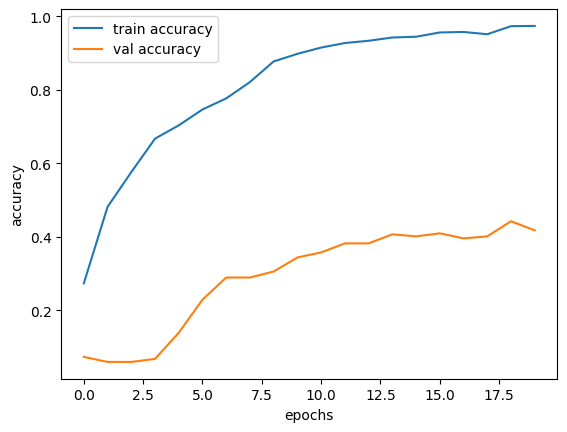

In [50]:
epochs = list(range(20))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

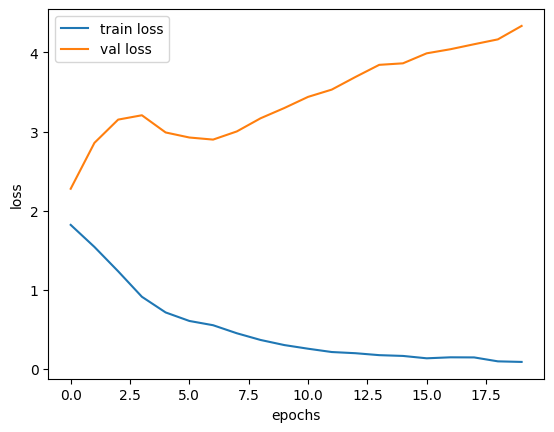

In [51]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()